In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

/home/manisha/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [13]:
#tensor that contains a constant value 2
t1= tf.constant(2.0,dtype=tf.float32)

In [3]:
print(t1)
#prints tensor objct that says its name of tensor as Const:0 this is assigned by tensorflow 
#unless u mention what the name is going to be using name keyword
#by printing tensor we don't get value but tensor
#to get value we need sessions

Tensor("Const:0", shape=(), dtype=float32)


In [4]:
t1= tf.constant(2.0,dtype=tf.float32, name='my_first_tensor')
t1
#dtype says the type of tensor
#tf.constant- allows tensor to have constant value

<tf.Tensor 'my_first_tensor:0' shape=() dtype=float32>

In [5]:
t2= tf.constant([1.0, 2.0],dtype=tf.float32, name='tensor2')
print(t2)

Tensor("tensor2:0", shape=(2,), dtype=float32)


In [6]:
#tf.Session gives a session object. When u call run() on that object and pass it a tensor object,
#it return value of that tensor
sess= tf.Session()
print(sess.run(t1)) #executing sesssion

2.0


In [7]:
sess.run(t2)

array([1., 2.], dtype=float32)

In [8]:
t3= tf.constant([[1.0,2.0,3.0],
                [5.0,6.0,7.0]],dtype= tf.float32, name='tensor3')
print(sess.run(t3))
print(t3)

[[1. 2. 3.]
 [5. 6. 7.]]
Tensor("tensor3:0", shape=(2, 3), dtype=float32)


In [9]:
sess.close()
#after using session, close it

In [10]:
#use session like this and no need to manually close it
with tf.Session() as sess:
    print(sess.run(t1))
    print(sess.run(t2))
    print(sess.run(t3))

2.0
[1. 2.]
[[1. 2. 3.]
 [5. 6. 7.]]


In [19]:
#Building Computational graph
node_1=tf.constant(2.0,dtype=tf.float32, name='leaf_node1')
node_2=tf.constant(3.0,dtype=tf.float32, name='leaf_node2')
node_3=tf.constant(5.0,dtype=tf.float32, name='leaf_node3')

cg_1=(node_1+node_2)* node_3

#Alternatiely
cg_1_1= tf.multiply(tf.add(node_1 , node_2), node_3)

<tf.Tensor 'mul_4:0' shape=() dtype=float32>

In [22]:
#Execute with session
with tf.Session() as sess:
    print(sess.run(cg_1))
    print(sess.run(cg_1_1))

25.0
25.0


In [25]:
node_1=tf.constant(7.0,dtype=tf.float32, name='leaf_node1')
node_2=tf.constant(8.0,dtype=tf.float32, name='leaf_node2')
node_3=tf.constant(9.0,dtype=tf.float32, name='leaf_node3')
node_4=tf.constant(10.0,dtype=tf.float32, name='leaf_node4')
node_5=tf.constant(7.0,dtype=tf.float32, name='leaf_node5')
node_6=tf.constant(10.0,dtype=tf.float32, name='leaf_node6')
node_7=tf.constant(19.5,dtype=tf.float32, name='leaf_node7')
cg_2 = tf.maximum((node_1 + node_2) - (node_3 + node_4), (node_5 * node_6)/ node_7)


In [26]:
with tf.Session() as sess:
    print(sess.run(cg_2))

3.5897436


In [34]:
node_1=tf.constant([9,10,11],dtype=tf.float32, name='leaf_node1')
node_2=tf.constant([7,8,6.5],dtype=tf.float32, name='leaf_node2')
node_3=tf.constant(5.6,dtype=tf.float32, name='leaf_node3')
node_4=tf.constant([7.65,9.0,6.75],dtype=tf.float32, name='leaf_node4')
node_5=tf.constant([13.5,7.18,17],dtype=tf.float32, name='leaf_node5')

cg_3= tf.minimum(((node_1 * node_2)/ node_3),(node_4 + node_5))

In [36]:
with tf.Session() as sess:
    print(sess.run(cg_3))

[11.25     14.285714 12.767858]


# Linear Regression using low level tf APIs

In [80]:
#create a dataset
X = np.linspace(-30, 300.0, 300)
Y= 2 * np.linspace(-25.0, 250.0, 300) + np.random.randn(*X.shape)

In [81]:
#Divide it to train and test set
train_X = X[:250]
train_Y = Y[:250]

test_X = X[250:]
test_Y = Y[250:]

In [118]:
#Let's define Hyperparameters
learning_rate = 0.000005
n_epochs = 1000
interval = 50

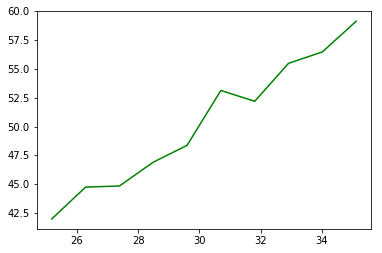

In [119]:
#Lets visualize the dataset for first 10 datapoints
plt.plot(train_X[50:60],train_Y[50:60],'g')
plt.show()

In [120]:
#Let's use placeholders
#they contain the input value for x and y for each iteration
x= tf.placeholder(tf.float32, name='x')
y= tf.placeholder(tf.float32, name='y')

In [121]:
#Lets build the Linear regression model
# values of variables change after every iteration, so we need them
W = tf.Variable(0.0, name='weight_1')
b= tf.Variable(0.0, name='bias_1')
pred_y= (W * x) + b

In [122]:
#loss function
loss = tf.reduce_mean(tf.square(y-pred_y))
#root mean square loss

In [124]:
#Optimizer is needed to update the values of these variables by using this loss function and 
#calculating the derivative w.r.t values present in these variable
optimizer =tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(loss)

In [127]:
#Execute using session
#One complete iteration through a dataset is one epoch
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(n_epochs):
        _,curr_loss = sess.run([optimizer, loss], feed_dict={x:train_X, y: train_Y})
        #print('Loss after epoch ',epoch,' is ',curr_loss)
        
    
    
        if epoch % interval ==0:
            print('Loss after epoch',epoch ,'is',curr_loss)

    final_preds, final_loss = sess.run([pred_y,loss], feed_dict={x:test_X, y:test_Y})
    print('The final loss is', final_loss)


Loss after epoch 0 is 49677.863
Loss after epoch 50 is 0.9854301
Loss after epoch 100 is 0.98528534
Loss after epoch 150 is 0.9852769
Loss after epoch 200 is 0.9852697
Loss after epoch 250 is 0.98526275
Loss after epoch 300 is 0.9852533
Loss after epoch 350 is 0.98524696
Loss after epoch 400 is 0.9852383
Loss after epoch 450 is 0.9852322
Loss after epoch 500 is 0.9852246
Loss after epoch 550 is 0.9852161
Loss after epoch 600 is 0.98520917
Loss after epoch 650 is 0.9852017
Loss after epoch 700 is 0.98519534
Loss after epoch 750 is 0.98518777
Loss after epoch 800 is 0.9851808
Loss after epoch 850 is 0.98517096
Loss after epoch 900 is 0.9851638
Loss after epoch 950 is 0.9851585
The final loss is 0.9025588
